In [1]:
import autolens as al
import autolens.plot as aplt
from pyprojroot import here
import numpy as np

workspace_path = str(here())
print("Workspace Path: ", workspace_path)

Workspace Path:  /home/carlos/autolens_workspace


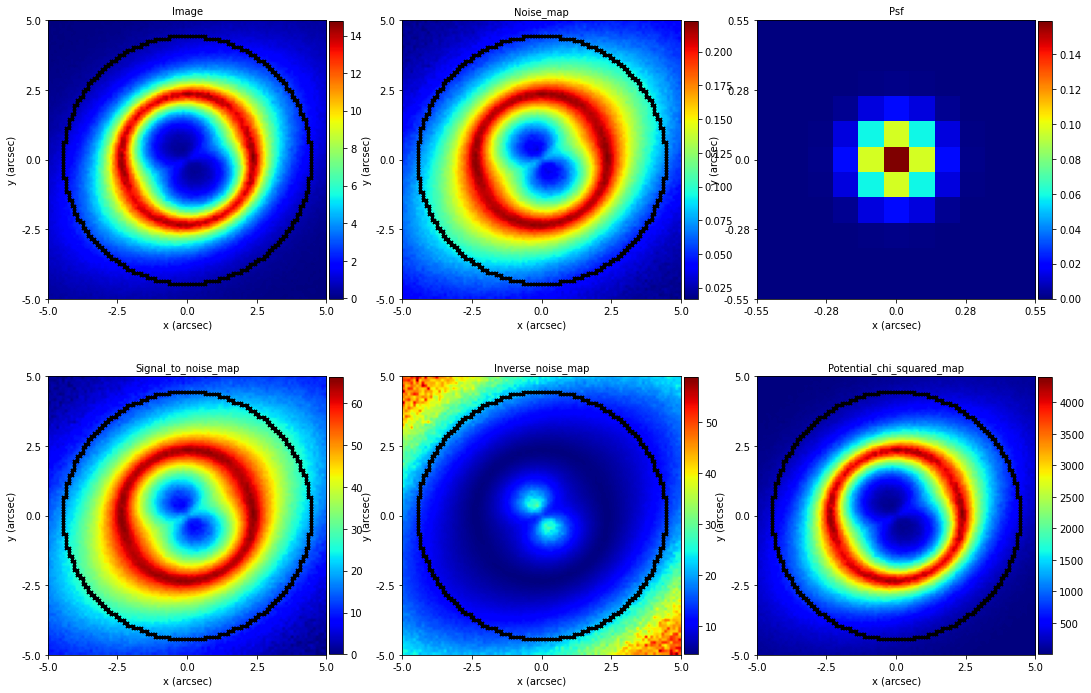

In [6]:
dataset_path = f"{workspace_path}/howtolens/PointMass2/Data"

imaging = al.Imaging.from_fits(
    image_path=f"{dataset_path}/MGEimage.fits",
    noise_map_path=f"{dataset_path}/MGEnoise_map.fits",
    psf_path=f"{dataset_path}/MGEpsf.fits",
    pixel_scales=0.1,
)

mask = al.Mask.circular(
    shape_2d=imaging.shape_2d, pixel_scales=imaging.pixel_scales, sub_size=2, radius=4.5
)

aplt.Imaging.subplot_imaging(imaging=imaging, mask=mask)

In [7]:
#Parâmetros do MGE
Surf_mge, sigma, qObs = np.loadtxt('/home/carlos/Documents/Dados Projeto/ESO325/Results/ESO325 MGE and JAM (07-07-20)/Codes/JAM Input.txt', unpack=True)

ML = 3.14
i = np.deg2rad(80)
M0 = Surf_mge*ML/1e4
M0 = M0[::-1]
q0 = np.sqrt(qObs**2 - np.cos(i)**2)/np.sin(i)
sigma0 = sigma

Critical curve could not be calculated due to an unphysical mass model
Critical curve could not be calculated due to an unphysical mass model
Critical curve could not be calculated due to an unphysical mass model
Critical curve could not be calculated due to an unphysical mass model
Critical curve could not be calculated due to an unphysical mass model
Critical curve could not be calculated due to an unphysical mass model


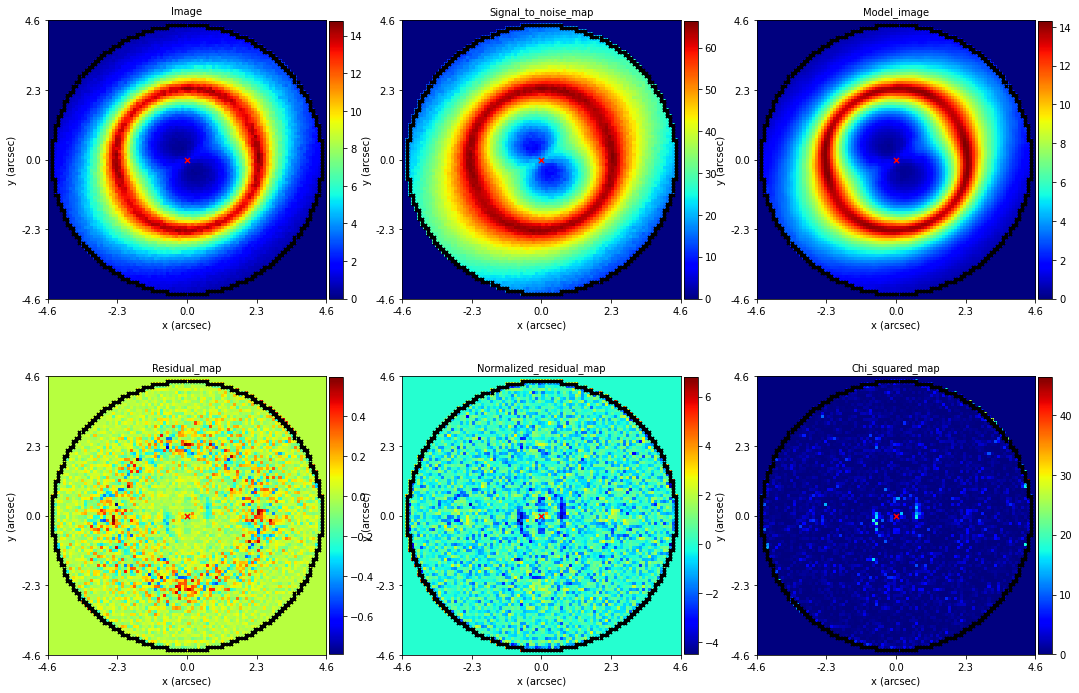

Critical curve could not be calculated due to an unphysical mass model
Critical curve could not be calculated due to an unphysical mass model
Critical curve could not be calculated due to an unphysical mass model
Caustics could not be calculated due to an unphysical mass model


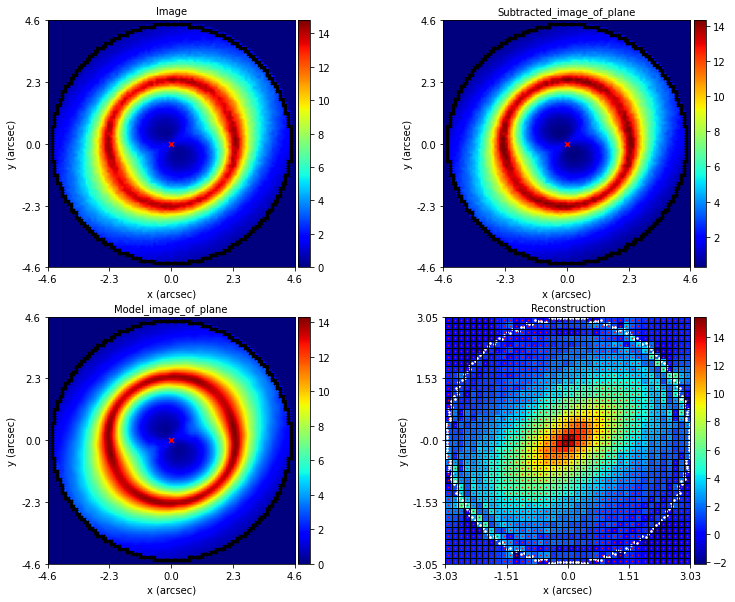

In [10]:
masked_imaging = al.MaskedImaging(imaging=imaging, mask=mask)
mass_profile = al.mp.MGE(centre=(0.0,0.0), einstein_radius=1.6)
mass_profile.MGE_comps(M=M0, sigma=sigma0, q=q0)

lens_galaxy = al.Galaxy(
    redshift=0.5,
    mass=mass_profile,
)


source_galaxy = al.Galaxy(
    redshift=1.0,
    pixelization=al.pix.Rectangular(shape=(40, 40)),
    regularization=al.reg.Constant(coefficient=0.5),
)


tracer = al.Tracer.from_galaxies(galaxies=[lens_galaxy, source_galaxy])

fit = al.FitImaging(masked_imaging=masked_imaging, tracer=tracer)

aplt.FitImaging.subplot_fit_imaging(fit=fit, include=aplt.Include(mask=True))
aplt.FitImaging.subplot_of_plane(
    fit=fit, plane_index=1, include=aplt.Include(mask=True)
)



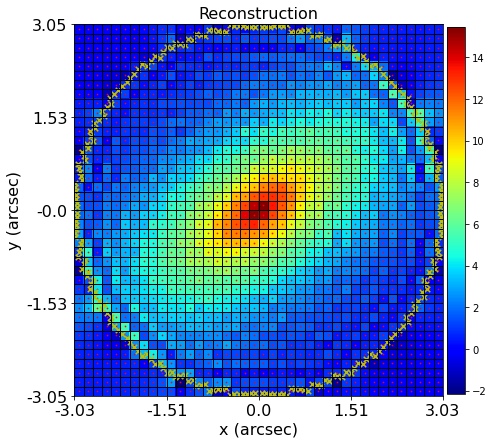

In [11]:
aplt.Inversion.reconstruction(
    inversion=fit.inversion, include=aplt.Include(inversion_pixelization_grid=True)
)



In [12]:
adaptive = al.pix.VoronoiMagnification(shape=(20, 20))

image_plane_sparse_grid = adaptive.sparse_grid_from_grid(grid=masked_imaging.grid)

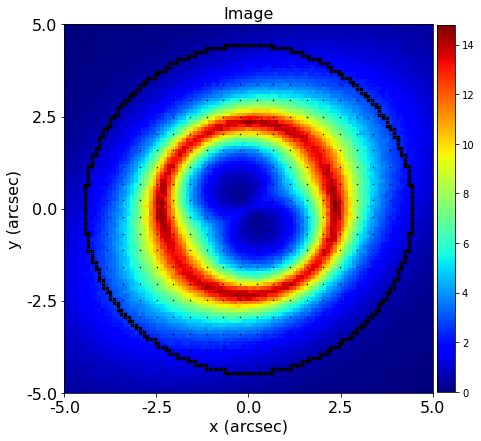

In [13]:
aplt.Imaging.image(imaging=imaging, grid=image_plane_sparse_grid, mask=mask)

In [14]:
source_galaxy = al.Galaxy(
    redshift=1.0, pixelization=adaptive, regularization=al.reg.Constant(coefficient=1.0)
)

tracer = al.Tracer.from_galaxies(galaxies=[lens_galaxy, source_galaxy])



Critical curve could not be calculated due to an unphysical mass model
Critical curve could not be calculated due to an unphysical mass model
Critical curve could not be calculated due to an unphysical mass model
Critical curve could not be calculated due to an unphysical mass model
Critical curve could not be calculated due to an unphysical mass model
Critical curve could not be calculated due to an unphysical mass model


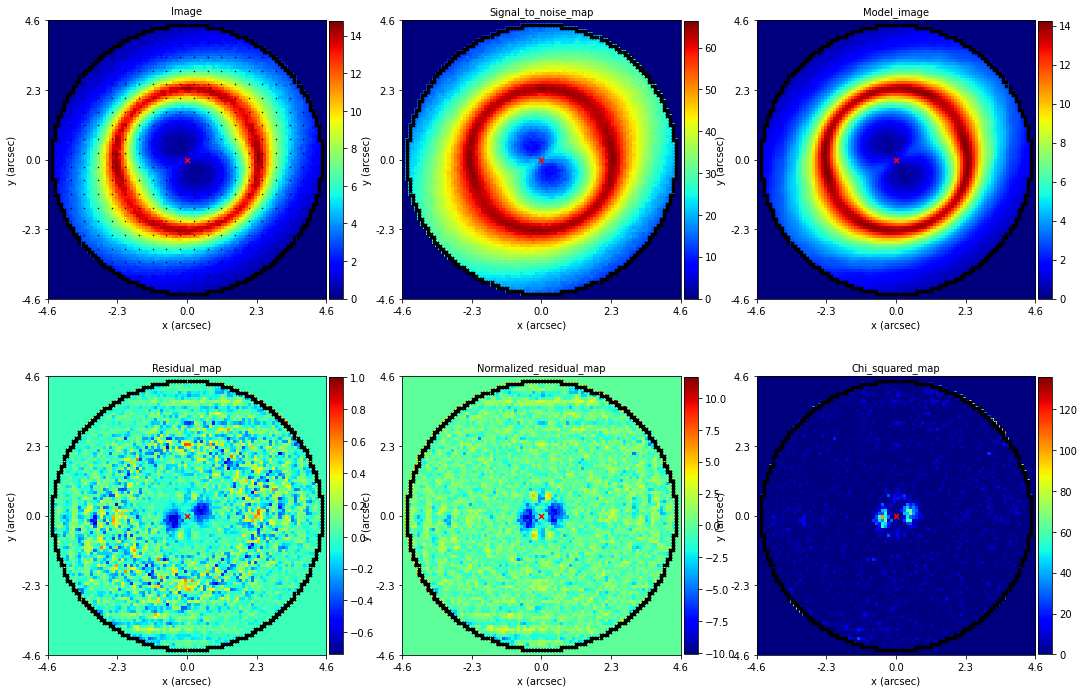

Critical curve could not be calculated due to an unphysical mass model
Critical curve could not be calculated due to an unphysical mass model
Critical curve could not be calculated due to an unphysical mass model
Caustics could not be calculated due to an unphysical mass model


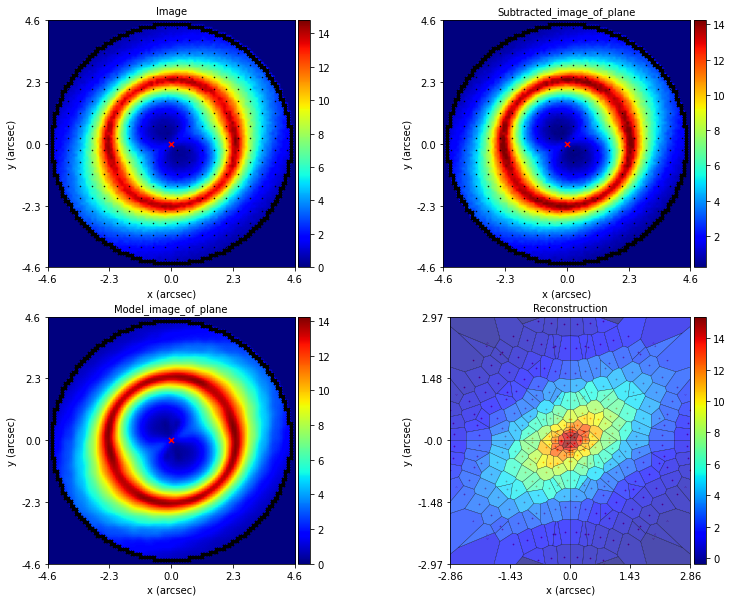

In [15]:
fit = al.FitImaging(masked_imaging=masked_imaging, tracer=tracer)

aplt.FitImaging.subplot_fit_imaging(
    fit=fit,
    include=aplt.Include(
        mask=True,
        inversion_image_pixelization_grid=True,
        inversion_pixelization_grid=True,
    ),
)
aplt.FitImaging.subplot_of_plane(
    fit=fit, plane_index=1, include=aplt.Include(mask=True)
)


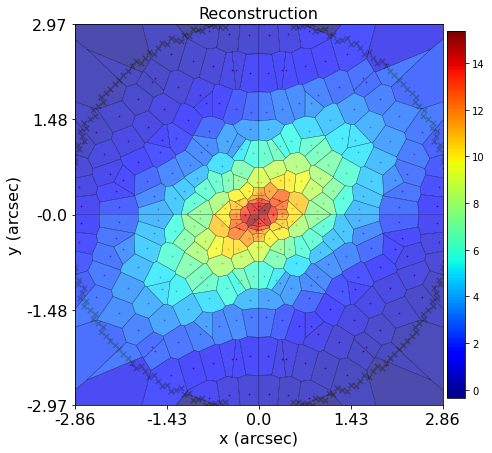

In [16]:
aplt.Inversion.reconstruction(
    inversion=fit.inversion, include=aplt.Include(inversion_pixelization_grid=True)
)